## Machine Learning - Linear Regressions

Linear Regression looks to fit a linear model with coefficients 'w' to minimize the residual sum of squares between the observed and estimate values.

Coefficients from the regression can be accessed using reg.coef\_ and the intercept reg.intercept\_ 

Slope or w1 : 2.11196048504
Intercept :  5.52582830502
Variance :  0.941476621718


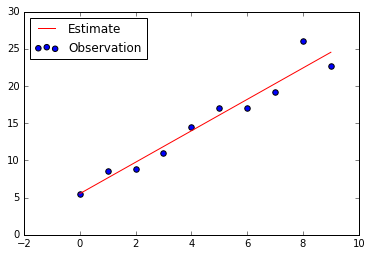

In [191]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

reg = linear_model.LinearRegression(fit_intercept=True, n_jobs=1, normalize=False)
X = np.arange(0,10,1).reshape(-1,1)
y = (X*2+3)
noise = (np.random.normal(np.mean(y),np.std(y),len(y))*0.3).reshape(-1,1)
y = y+noise

reg.fit(X,y)
print 'Slope or w1 :',reg.coef_[0][0]
print 'Intercept : ',reg.intercept_[0]
print 'Variance : ',reg.score(X,y)

plt.plot(X, reg.predict(X), color='r',linewidth=1,label='Estimate')
plt.scatter(X,y,s=30, label='Observation')
plt.legend(loc=0)
plt.show()


### Example from Udacity's Intro to machine learning

https://www.udacity.com/course/intro-to-machine-learning--ud120

Using the Enron dataset

In [17]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

In [231]:
# Features for cross plotting and performing regressions
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### Split data into train and test sets
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

#### Creating a predictive model for bonus based on salary data 

Here we look at cross plots of bonus vs salary data and the difference in solution when subsets of the data are used for building linear regression solutions. 

Regression of bonus with salary
Regression Score: -1.48499241737
Regression Coefficients: [ 5.44814029]
Intercept: -102360.543294
Alt. Regression Coefs [ 2.27410114]


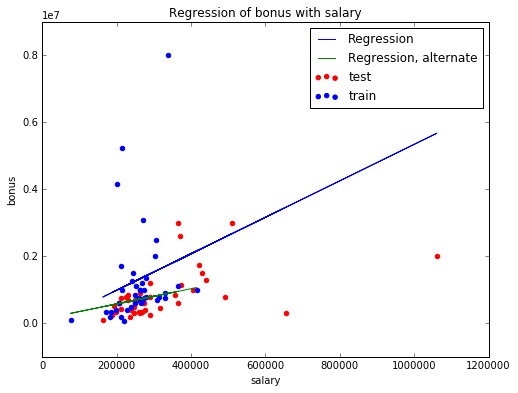

In [236]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(feature_train,target_train)
print 'Regression of',features_list[0], 'with',features_list[1]
print 'Regression Score:',reg.score(feature_test,target_test)
print 'Regression Coefficients:', reg.coef_
print 'Intercept:', reg.intercept_

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

try:
    plt.plot( feature_test, reg.predict(feature_test), label='Regression')
except NameError:
    pass

reg.fit(feature_test, target_test)
print 'Alt. Regression Coefs', reg.coef_
plt.plot(feature_train, reg.predict(feature_train), color="g", label='Regression, alternate') 

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.title('Regression of '+features_list[0]+' with '+features_list[1])
plt.legend()
plt.show()


### Now we'll explore the dataset within the dictionary

Here we find a linear relationship between bonus and long term inceptive for employees within the Eron dataset.

In [225]:
print 'Dictionary with keys: ',dictionary.keys()[0:5], '..'
print 'Elements in dictionary',len(dictionary.keys())

Dictionary with keys:  ['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P'] ..
Elements in dictionary 143


In [226]:
print 'Features for each dictionary elmenet',dictionary.values()[0]

Features for each dictionary elmenet {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


In [227]:
# Features for cross plotting and performing regressions
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### Split data into train and test sets
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

Regression of bonus with long_term_incentive
Regression Score: -0.59271289995
Regression Coefficients: [ 1.19214699]
Intercept: 554478.756215


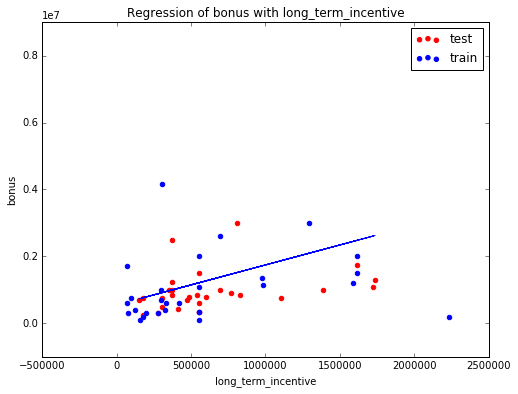

In [228]:
reg = linear_model.LinearRegression()

reg.fit(feature_train,target_train)
print 'Regression of',features_list[0], 'with',features_list[1]
print 'Regression Score:',reg.score(feature_test,target_test)
print 'Regression Coefficients:', reg.coef_
print 'Intercept:', reg.intercept_

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.title('Regression of '+features_list[0]+' with '+features_list[1])
plt.legend()
plt.show()

#### Summary

Finding the best fit solution for bonus vs long term incentive and bonus vs salary, it turns out that long term incentive was a better predictor of bonus offering for the Enron employees